# **Aircraft Risk Analysis for Business Expansion**

### **Overview**
This notebook presents an aviation safety risk analysis based on civil aviation accident data collected by the National Transportation Safety Board (NTSB) from 1962 to 2023. The goal is to identify aircraft models and flight conditions associated with the lowest risk, to inform procurement and operational strategies as the company enters the aviation industry.

### **Business Problem**
The company seeks to expand into aviation services but lacks detailed insight into the safety records of various aircraft and flight types. Poor decisions in this area could lead to high operational risk and financial losses. Therefore, an evidence-based evaluation of accident patterns is critical.

### **Objectives of the Analysis**
- Identify low-risk aircraft models based on historical accident data
- Evaluate accident trends across flight phases and weather conditions
- Analyze the safety record of different flight purposes
- Deliver actionable recommendations to reduce risk in aircraft procurement and operations

### **Analysis Steps**
1. Import Libraries and Load Dataset
2. Data Cleaning and Preprocessing
3. Risk Analysis and Visualisations
    - Analyze risk by flight purpose
    - Analyze risk by flight phase
    - Analyze risk by weather conditions
    - Analyze risk by aircraft make and model
5. Summary of Recommendations

# 1. Import Libraries and Load Dataset
This section imports key Python libraries required for data manipulation, visualization, and analysis.  
It also loads the dataset and stores it in a dataframe called df.

In [258]:
# import the necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 
%matplotlib inline

In [259]:
# import the 'aviation.csv' dataset
df = pd.read_csv('AviationData.csv', encoding = 'ISO-8859-1', low_memory=False)

# preview the dataset
df.head()

Event.Id Investigation.Type Accident.Number  Event.Date  \
0  20001218X45444           Accident      SEA87LA080  1948-10-24   
1  20001218X45447           Accident      LAX94LA336  1962-07-19   
2  20061025X01555           Accident      NYC07LA005  1974-08-30   
3  20001218X45448           Accident      LAX96LA321  1977-06-19   
4  20041105X01764           Accident      CHI79FA064  1979-08-02   

          Location        Country   Latitude   Longitude Airport.Code  \
0  MOOSE CREEK, ID  United States        NaN         NaN          NaN   
1   BRIDGEPORT, CA  United States        NaN         NaN          NaN   
2    Saltville, VA  United States  36.922223  -81.878056          NaN   
3       EUREKA, CA  United States        NaN         NaN          NaN   
4       Canton, OH  United States        NaN         NaN          NaN   

  Airport.Name  ... Purpose.of.flight Air.carrier Total.Fatal.Injuries  \
0          NaN  ...          Personal         NaN                  2.0   
1          NaN  ...          Personal         NaN                  4.0   
2          NaN  ...          Personal         NaN                  3.0   
3          NaN  ...          Personal         NaN                  2.0   
4          NaN  ...          Personal         NaN                  1.0   

  Total.Serious.Injuries Total.Minor.Injuries Total.Uninjured  \
0                    0.0                  0.0             0.0   
1                    0.0                  0.0             0.0   
2                    NaN                  NaN             NaN   
3                    0.0                  0.0             0.0   
4                    2.0                  NaN             0.0   

  Weather.Condition  Broad.phase.of.flight   Report.Status Publication.Date  
0               UNK                 Cruise  Probable Cause              NaN  
1               UNK                Unknown  Probable Cause       19-09-1996  
2               IMC                 Cruise  Probable Cause       26-02-2007  
3               IMC                 Cruise  Probable Cause       12-09-2000  
4               VMC               Approach  Probable Cause       16-04-1980  

[5 rows x 31 columns]

In [260]:
# Obtain the number of rows and columns 
df.shape

(88889, 31)

In [261]:
# Obtain summary data of the columns in the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 88889 entries, 0 to 88888
Data columns (total 31 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Event.Id                88889 non-null  object 
 1   Investigation.Type      88889 non-null  object 
 2   Accident.Number         88889 non-null  object 
 3   Event.Date              88889 non-null  object 
 4   Location                88837 non-null  object 
 5   Country                 88663 non-null  object 
 6   Latitude                34382 non-null  object 
 7   Longitude               34373 non-null  object 
 8   Airport.Code            50132 non-null  object 
 9   Airport.Name            52704 non-null  object 
 10  Injury.Severity         87889 non-null  object 
 11  Aircraft.damage         85695 non-null  object 
 12  Aircraft.Category       32287 non-null  object 
 13  Registration.Number     87507 non-null  object 
 14  Make                    88826 non-null

In [262]:
# Obtain the summary statistics for all the numeric columns
df.describe()

Number.of.Engines  Total.Fatal.Injuries  Total.Serious.Injuries  \
count       82805.000000          77488.000000            76379.000000   
mean            1.146585              0.647855                0.279881   
std             0.446510              5.485960                1.544084   
min             0.000000              0.000000                0.000000   
25%             1.000000              0.000000                0.000000   
50%             1.000000              0.000000                0.000000   
75%             1.000000              0.000000                0.000000   
max             8.000000            349.000000              161.000000   

       Total.Minor.Injuries  Total.Uninjured  
count          76956.000000     82977.000000  
mean               0.357061         5.325440  
std                2.235625        27.913634  
min                0.000000         0.000000  
25%                0.000000         0.000000  
50%                0.000000         1.000000  
75%                0.000000         2.000000  
max              380.000000       699.000000

# 2. Data Cleaning and Preprocessing
This section handles missing values, convert data types, and prepare columns such as total injuries and aircraft identifiers.

In [264]:
# Identify missing values in our dataset
df.isna().sum()

Event.Id                      0
Investigation.Type            0
Accident.Number               0
Event.Date                    0
Location                     52
Country                     226
Latitude                  54507
Longitude                 54516
Airport.Code              38757
Airport.Name              36185
Injury.Severity            1000
Aircraft.damage            3194
Aircraft.Category         56602
Registration.Number        1382
Make                         63
Model                        92
Amateur.Built               102
Number.of.Engines          6084
Engine.Type                7096
FAR.Description           56866
Schedule                  76307
Purpose.of.flight          6192
Air.carrier               72241
Total.Fatal.Injuries      11401
Total.Serious.Injuries    12510
Total.Minor.Injuries      11933
Total.Uninjured            5912
Weather.Condition          4492
Broad.phase.of.flight     27165
Report.Status              6384
Publication.Date          13771
dtype: i

In [265]:
# drop columns that are not needed in the data analysis and have a lot of missing values
df.drop(['Latitude','Longitude','Airport.Code', 'Airport.Name',
         'FAR.Description','Aircraft.Category','Schedule','Air.carrier',
        'Publication.Date'],
         axis=1, inplace = True)

In [266]:
# Verify unnecessary columns have been dropped
df.columns

Index(['Event.Id', 'Investigation.Type', 'Accident.Number', 'Event.Date',
       'Location', 'Country', 'Injury.Severity', 'Aircraft.damage',
       'Registration.Number', 'Make', 'Model', 'Amateur.Built',
       'Number.of.Engines', 'Engine.Type', 'Purpose.of.flight',
       'Total.Fatal.Injuries', 'Total.Serious.Injuries',
       'Total.Minor.Injuries', 'Total.Uninjured', 'Weather.Condition',
       'Broad.phase.of.flight', 'Report.Status'],
      dtype='object')

In [267]:
# Identify columns useful for our analysis
# Replace missing values with placeholders where appropriate

df['Weather.Condition'] = df['Weather.Condition'].fillna('Unknown')
df['Broad.phase.of.flight'] = df['Broad.phase.of.flight'].fillna('Unknown')
df['Purpose.of.flight'] = df['Purpose.of.flight'].fillna('Unknown')
df['Make'] = df['Make'].fillna('Unknown')
df['Model'] = df['Model'].fillna('Unknown')

In [268]:
# Combine Make and Model for aircraft identification
df['Make.Model'] = df['Make'].str.upper() + ' ' + df['Model'].str.upper()

# Preview the resulting column
df['Make.Model'].head()

0     STINSON 108-3
1    PIPER PA24-180
2       CESSNA 172M
3      ROCKWELL 112
4        CESSNA 501
Name: Make.Model, dtype: object

In [269]:
# Convert date column to datetime
df['Event.Date'] = pd.to_datetime(df['Event.Date'], errors='coerce')

# Verify the datatype of the column
df['Event.Date'].dtype

dtype('<M8[ns]')

In [270]:
# fill missing values with 0 for the numeric columns
df.fillna({'Total.Fatal.Injuries':0, 'Total.Serious.Injuries':0, 'Total.Minor.Injuries':0, 'Total.Uninjured':0}, inplace=True)

In [271]:
# Create total injuries column by adding the fatal and serious injuries
df['Total.Injuries'] = df['Total.Fatal.Injuries'] + df['Total.Serious.Injuries']

# 3. Risk Analysis and Visualisations
This section analyzes and visualizes trends in accident severity and frequency based on our objectives

## 3.1 Risk by Flight Purpose
In this analysis we're grouping by 'Purpose.of.flight' to calculate:
- Average injuries per accident type
- Total number of accidents for each flight purpose

In [273]:
flight_purpose_risk = (
    df.groupby("Purpose.of.flight")
    .agg(Average_Injuries=("Total.Injuries", "mean"), Total_Accidents=("Purpose.of.flight", "count"))
    .reset_index()
    .sort_values(by="Average_Injuries")
)

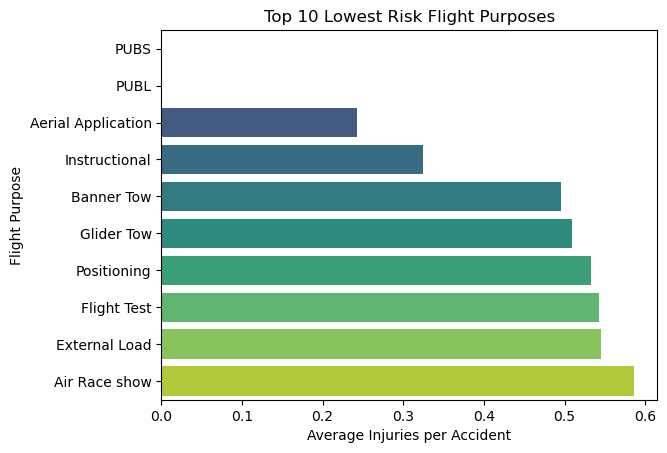

In [274]:
# Plotting the 10 flight purposes with the lowest average injuries per accident.

sns.barplot(data=flight_purpose_risk.head(10), y="Purpose.of.flight", x="Average_Injuries", hue="Purpose.of.flight", palette="viridis", legend=False)
plt.title("Top 10 Lowest Risk Flight Purposes")
plt.xlabel("Average Injuries per Accident")
plt.ylabel("Flight Purpose")

# Save plot generated
plt.savefig("images/flight_purpose_risk.png")
plt.show()

*Finding 1:* Aerial Application and Banner Towing are among the safest flight purposes.

## 3.2 Risk by Flight Phase
In this analysis we're grouping by 'Broad.phase.of.flight' to compute:
- Average injuries during each flight phase
- Total accident count per phase

In [277]:
phase_risk = (
    df.groupby("Broad.phase.of.flight")
    .agg(Average_Injuries=("Total.Injuries", "mean"), Total_Accidents=("Broad.phase.of.flight", "count"))
    .reset_index()
    .sort_values(by="Average_Injuries")
)

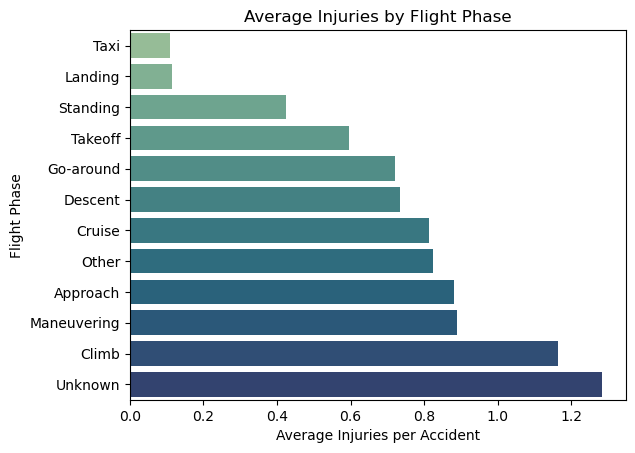

In [316]:
# Bar chart showing average injuries across flight phases.

sns.barplot(data=phase_risk, y="Broad.phase.of.flight", x="Average_Injuries", hue="Broad.phase.of.flight", palette="crest", legend=False)
plt.title("Average Injuries by Flight Phase")
plt.xlabel("Average Injuries per Accident")
plt.ylabel("Flight Phase")

# Save plot generated
plt.savefig("images/flight_phase_risk.png")
plt.show()

*Finding2:* Maneuvering and Go-around phases have the lowest injury rates; Taxiing and Standing are most severe.

### 3.3 Risk by Weather Condition
In this analysis we're grouping by 'Weather.Condition' to analyze:
- Average injuries per weather condition
- Frequency of accidents in each condition

In [281]:
weather_risk = (
    df.groupby("Weather.Condition")
    .agg(Average_Injuries=("Total.Injuries", "mean"), Total_Accidents=("Weather.Condition", "count"))
    .reset_index()
    .sort_values(by="Average_Injuries")
)

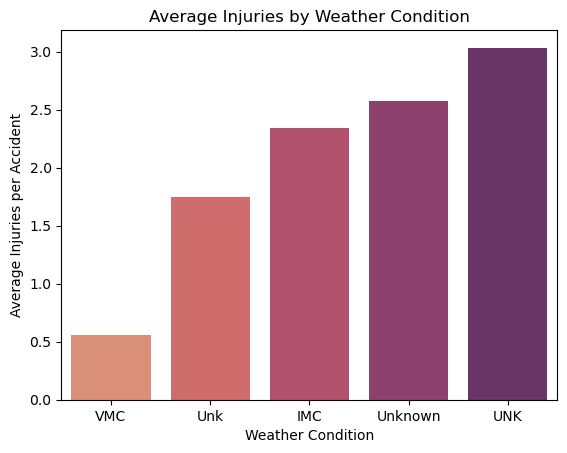

In [282]:
# Visualizing injury severity under various weather conditions.

sns.barplot(data=weather_risk, x="Weather.Condition", y="Average_Injuries", hue="Weather.Condition", palette="flare", legend=False)
plt.title("Average Injuries by Weather Condition")
plt.xlabel("Weather Condition")
plt.ylabel("Average Injuries per Accident")

# Save plot generated
plt.savefig("images/weather_risk.png")
plt.show()

*Finding3:* VMC (clear weather) is safest; IMC (instrument conditions) shows significantly higher injury rates.

# 3.4 Risk by Aircraft Make and Model
In this analysis we're grouping by 'Make.Model' to evaluate:
- Total number of accidents associated with each aircraft type
- Compare most and least frequently involved aircraft models


In [285]:
make_model_risk = (
    df.groupby("Make.Model")
    .agg(Average_Injuries=("Total.Injuries", "mean"), Total_Accidents=("Make.Model", "count"))
    .reset_index()
)

In [286]:
# Top 15 aircraft models with the MOST recorded accidents
make_model_risk_top_accidents = make_model_risk.sort_values(by="Total_Accidents", ascending=False).head(15)

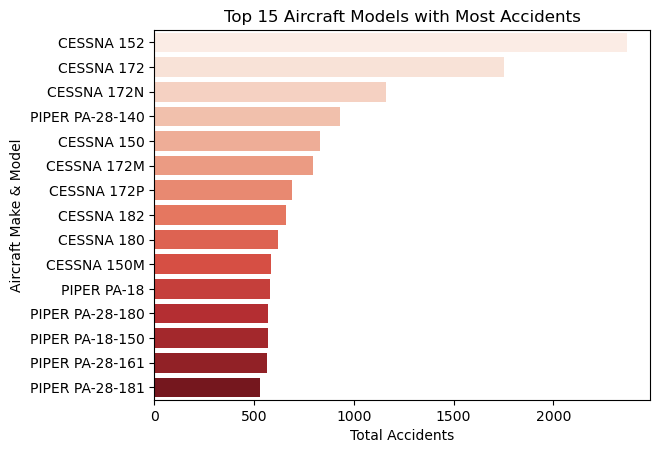

In [287]:
# Chart of top 15 aircraft models with the most total accidents.
sns.barplot(data=make_model_risk_top_accidents, y="Make.Model", x="Total_Accidents", hue="Make.Model", palette="Reds", legend=False)
plt.title("Top 15 Aircraft Models with Most Accidents")
plt.xlabel("Total Accidents")
plt.ylabel("Aircraft Make & Model")

# Save plot generated
plt.savefig("images/aircraft_most_accidents.png")
plt.show()

In [288]:
# Top 15 aircraft models with the LEAST recorded accidents (with at least 2 reports)
least_accidents = make_model_risk[make_model_risk['Total_Accidents'] >= 2].sort_values(by="Total_Accidents", ascending=True).head(15)

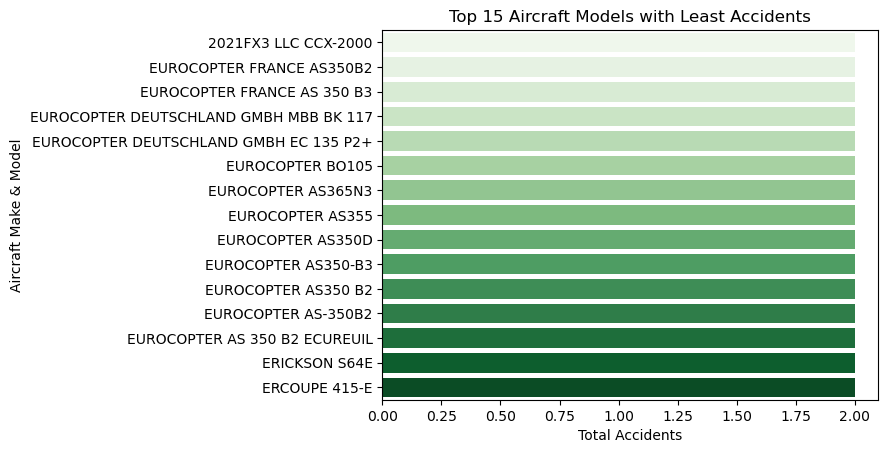

In [289]:
# Chart of top 15 aircraft models with the least total accidents.
sns.barplot(data=least_accidents, y="Make.Model", x="Total_Accidents", hue="Make.Model", palette="Greens", legend=False)
plt.title("Top 15 Aircraft Models with Least Accidents")
plt.xlabel("Total Accidents")
plt.ylabel("Aircraft Make & Model")

# Save plot generated
plt.savefig("images/aircrafts_least_accidents.png")
plt.show()

*Finding4:* 
- The most frequently involved models (top 15) may indicate high operational volume, aging fleets, or systemic issues.
- The least frequently involved models (with at least 2 reports) may reflect safer aircraft, better maintenance practices, or low exposure.

# 4. Summary of Recommendations
1. **Flight Purpose:**
    - Favor operations like Aerial Application and Banner Towing, which show low injury rates.
3. **Flight Phase:**
    - Ensure safety procedures and technology are in place during high-risk phases like Taxiing and Standing.
5. **Weather Conditions:**
    - Prioritize flights in Visual Meteorological Conditions (VMC) and equip aircraft for safe operation in IMC.
7. **Aircraft Models:**
    - Focus on aircraft with historically low accident frequencies for procurement, such as models identified in the 'Least Accidents' group.
    - Be cautious with models that appear frequently in accident reports; evaluate their usage context.